## **Program 1**

##  Measurement in different bases
Qiskit allows measurement only in the computational basis directly. However, we can also perform meaurements in other bases. 
For example, consider the Hadamard basis $\{|+\rangle, |-\rangle\}$. When we measure in this basis, we get an outcome that is one of the two basis vectors. This can be done by projecting a general state $|\psi\rangle$ onto each of the basis states $|+\rangle$ and $|-\rangle$. The probability of obtaining the $+$ outcome is $ P_{+}(|\psi\rangle) = |\langle +|\psi\rangle |^{2}$ and similarly for $-$. We note here that $|+\rangle = H|0\rangle$. Taking the adoint of this equation, we get $\langle +| = \langle 0|H^{\dagger} = \langle 0|H$ where we have used the fact that the Hadamard transformation is equal to it's adjoint (easily verified from the matrix representation). So we can write $ P_{+}(|\psi\rangle) = |\langle +|\psi\rangle |^{2} =  |\langle 0| H\psi\rangle |^{2}$. It seems that the probability of measuring the $+$ outcome in the Hadamard basis is the same as the probability of measuring $0$ in the computational basis after applying the Hadamard transformation to the statevector $|\psi\rangle$. So, if we want to measure in the Hadamard basis, we need only to apply a Hadamard gate to our qubit and measure in the computational basis. Similar arguments apply to measuring in other bases too. If we can transform the standard basis states into the basis states for some basis $\mathcal{B}$ via some transformation, applying the inverse transformation allows us to measure in the basis $\mathcal{B}$ using standard basis measurements. 


## **Problem**

To prepare the state $|i\rangle$ in a quantum circuit and measure it in the Hadamard basis $\{ |+\rangle, |-\rangle \}$. Add appropriate gates to prepare the $|i\rangle$ state and then add the appropriate gates and a standard basis measurement to measure required it in the Hadamard basis. It is required that to use separate gates for both these actions. 

In [4]:
#Importing Python libraries and standard Qiskit libraries

%matplotlib inline
import hashlib
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute
from qiskit.circuit import Parameter
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.circuit.library import HGate

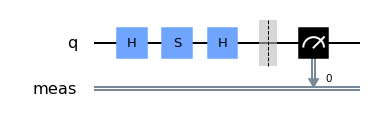

In [5]:
# Quantum Circuit Implementation for Problem 

qc1 = QuantumCircuit(1) 
# Insert gates below to create the state 
qc1.h(0)
qc1.s(0)
qc1.h(0)
# Insert the necessary gates to change to the Hadamard basis below and measure
qc1.measure_all()

qc1.draw('mpl')

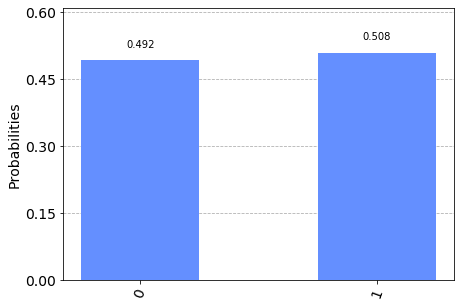

In [7]:
# Visualizing the measured Quantum State

basis_gates = ['id', 'x', 'y', 'z', 's', 't', 'sdg', 'tdg', 'h', 'p', 'sx' ,'r', 'rx', 'ry', 'rz', 'u', 'u1', 'u2', 'u3', 'barrier', 'measure']
assert list(qc1.count_ops()) != [], "Circuit cannot be empty"
assert set(qc1.count_ops().keys()).intersection(basis_gates) != set(), "Only basic gates are allowed"
job = execute(qc1, backend=QasmSimulator(), shots=1024, seed_simulator=0)
counts = job.result().get_counts()
sv_check = Statevector.from_instruction(qc1.remove_final_measurements(inplace=False)).evolve(HGate()).equiv(Statevector.from_label('r'))
op_check_dict = qc1.count_ops()
_ = op_check_dict.pop('measure', None)
_ = op_check_dict.pop('barrier', None)
op_check = len(op_check_dict) > 1
answer1 = hashlib.sha256((str(counts)+str(sv_check and op_check)).encode()).hexdigest()
plot_histogram(counts)